In [124]:
import PIL
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd 

In [125]:
img_name = 'cookies/cookie1.jpg' #cookie image

In [126]:
def cookie_color(filename):
    
    img1 = cv.imread(filename, 1)
    
    #scale the image
    scaled_cookie = cv.resize(img1, (255,255))
    blur = cv.blur(scaled_cookie, (10,10))    #use bilteral smoothing to preserve the edges
    
    #grabcut for extracting the cookie foreground
    mask = np.zeros(scaled_cookie.shape[:2], np.uint8)

    bgmodel = np.zeros((1,65), np.float64)
    fgmodel = np.zeros((1,65), np.float64)

    #only the edges(20 px) will def be the background 
    rectangle = (20, 20, 234, 234) 

    cv.grabCut(scaled_cookie, mask, rectangle, bgmodel, fgmodel, 10, cv.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8') 

    image_fg = blur * mask2[:, :, np.newaxis]  #put the mask over the blurred image, not the original scaled one
    
    #make a list of the foreground pixel values
    only_cookie = []

    for row in range(20, image_fg.shape[0]-20):
        for col in range(20, image_fg.shape[1]-20):

            if(sum(image_fg[row,col]) != 0):
                #print(image_fg[row,col])
                only_cookie.append(list(image_fg[row,col,::-1]))#reverse the array because it is in bgr; we want rgb
                
    
    #finding the top 3 colour codes manually
    hex_list = [rgb_to_hex(pixel) for pixel in only_cookie]
    hex_counts = pd.Series(hex_list).value_counts() # gives counts for each hex value

    top_3 = list(hex_counts.index[:3])
                
    return top_3

In [127]:
#get the average cookie color
def average_cookie_color(only_cookie):
    #averaging the reds, blues and greens to get the overall average colour
    b_val = 0
    g_val = 0
    r_val = 0

    for r,g,b in only_cookie:
        b_val += b
        g_val += g
        r_val += r

    avg_color = [r_val, g_val, b_val] #making it into rgb instead of bgr
    avg_color = [math.floor(val/len(only_cookie)) for val in avg_color]

    #making an ndarray of 100x100 to show the sample of the average color 
    cookie_color_samp = np.array([[avg_color] * 100]*100)
    plt.imshow(cookie_color_samp)
    
    return avg_color

#convert rgb to hexcode
def rgb_to_hex(color):
    #finding the hex value of each color
    hex_col = [hex(val) for val in color]
    #removing the 0x from the beginning
    hex_col = ['0' + a[2:] if (len(a[2:])==1) else a[2:] for a in hex_col] #hex values may have only one digit, if so add a 0 b/c hexcodes must be 6 digits 

    hex_code = ''
    return ('#' + hex_code.join(hex_col).upper())
 
#convert hexcode to rgb
def hex_to_rgb(hex):
    
    code = hex[1:] #remove the '#' char
    code_split = [code[i]+code[i+1] for i in range(0,len(code)-1,2)]
    rgb = [int(val, 16) for val in code_split]
    
    return rgb    

#shows the shade sample of the given rgb vector 
def show_color(rgb):
    
    cookie_color_samp = np.array([[rgb] * 1]*1)
    plt.imshow(cookie_color_samp)

['#B99A75', '#B99B77', '#B48E66']
Here is the best match!


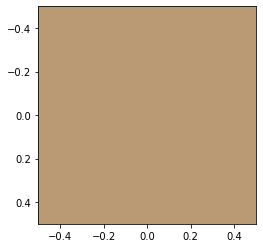

In [128]:
colors = cookie_color(img_name)
print(colors)

print("Here is the best match!")
show_color(hex_to_rgb(colors[0]))